In [1]:
# 📓 03_eda_fraud.ipynb

# === 1. Imports and Setup ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append(os.path.abspath("../"))
from src.config import FRAUD_CLEANED_PATH
from src.utils import load_csv

# Set visual style
sns.set(style="whitegrid")


In [5]:
# === Set figure output directory ===
FIG_DIR = os.path.abspath("../reports/figures/fraud_fig")
os.makedirs(FIG_DIR, exist_ok=True)  # Create it if not exists

def save_plot(fig, filename):
    filepath = os.path.join(FIG_DIR, filename)
    fig.savefig(filepath, bbox_inches='tight')
    print(f"Saved plot to: {filepath}")


In [7]:
# === 2. Load Cleaned Data ===
fraud_df = load_csv(FRAUD_CLEANED_PATH)
print(f"fraud_df shape: {fraud_df.shape}")


[INFO] Loaded data: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\data\processed\fraud_cleaned.csv | Shape: (151112, 11)
fraud_df shape: (151112, 11)


Saved plot to: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\reports\figures\target_distribution.png


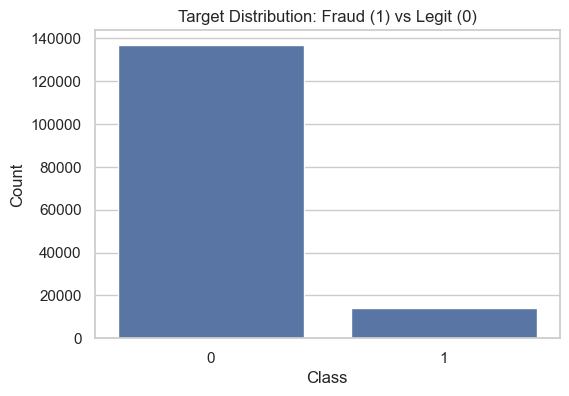

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=fraud_df, x='class', ax=ax)
ax.set_title("Target Distribution: Fraud (1) vs Legit (0)")
ax.set_xlabel("Class")
ax.set_ylabel("Count")
save_plot(fig, "target_distribution.png")
plt.show()


Saved plot to: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\reports\figures\dist_purchase_value.png


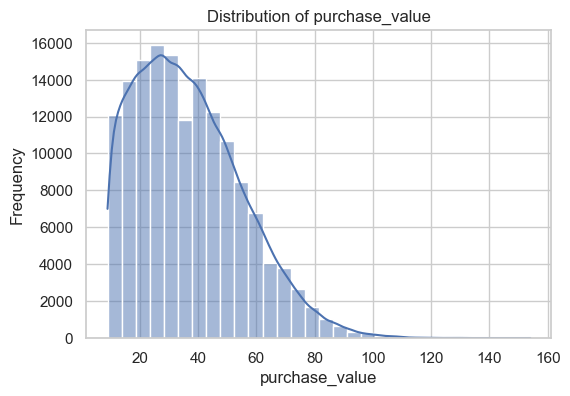

Saved plot to: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\reports\figures\dist_age.png


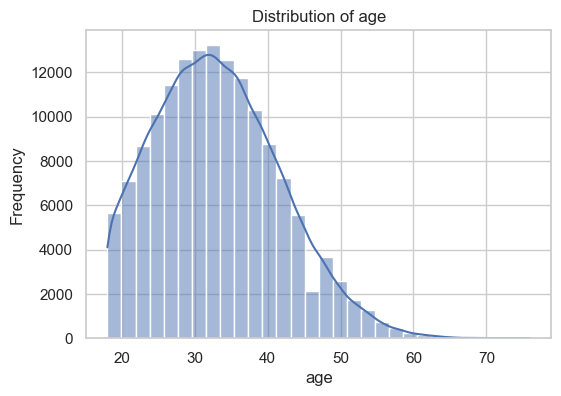

In [10]:
# === Numerical Features ===
num_cols = ['purchase_value', 'age']
for col in num_cols:
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.histplot(fraud_df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    save_plot(fig, f"dist_{col}.png")
    plt.show()


Saved plot to: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\reports\figures\dist_browser.png


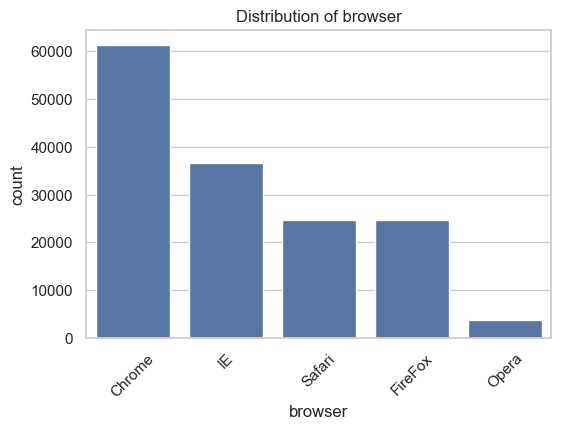

Saved plot to: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\reports\figures\dist_source.png


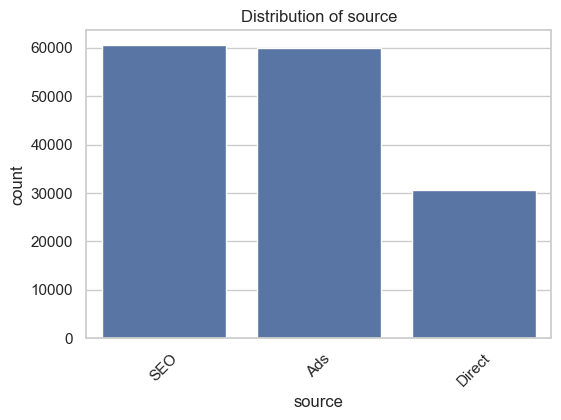

Saved plot to: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\reports\figures\dist_sex.png


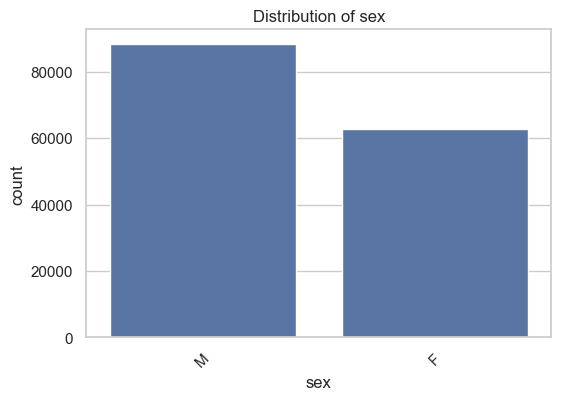

In [11]:
# === Categorical Features ===
cat_cols = ['browser', 'source', 'sex']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=fraud_df, x=col, order=fraud_df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    save_plot(fig, f"dist_{col}.png")
    plt.xticks(rotation=45)
    plt.show()


Saved plot to: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\reports\figures\dist_source.png


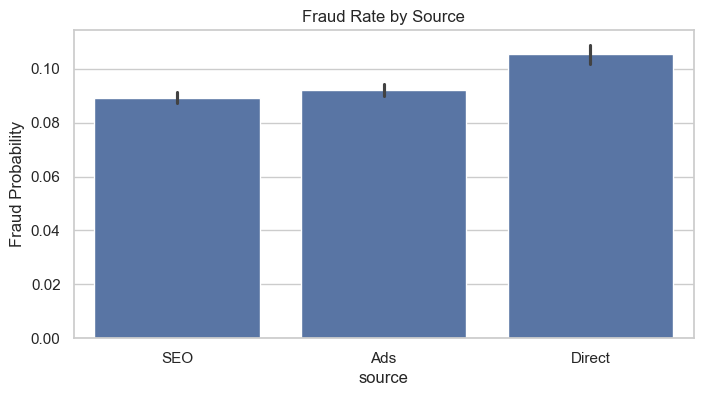

In [12]:
# === Fraud Rate by Source ===
plt.figure(figsize=(8, 4))
sns.barplot(data=fraud_df, x='source', y='class')
plt.title("Fraud Rate by Source")
plt.ylabel("Fraud Probability")
save_plot(fig,"dist_source.png")
plt.show()


Saved plot to: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\reports\figures\dist_browser.png


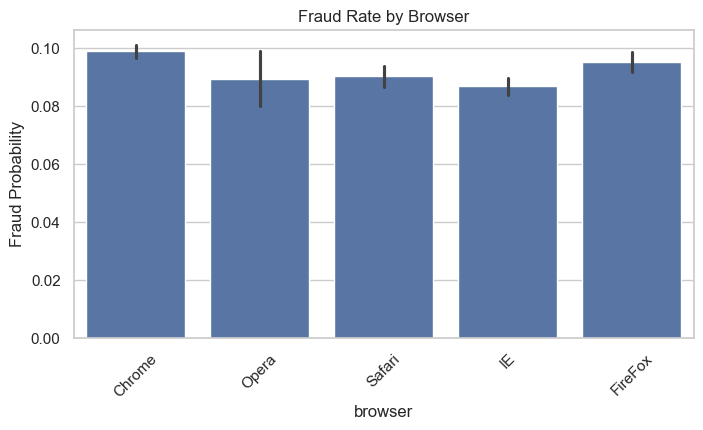

In [13]:
# === Fraud Rate by Browser ===
plt.figure(figsize=(8, 4))
sns.barplot(data=fraud_df, x='browser', y='class')
plt.title("Fraud Rate by Browser")
plt.ylabel("Fraud Probability")
save_plot(fig,"dist_browser.png")
plt.xticks(rotation=45)
plt.show()


Saved plot to: C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\reports\figures\boxplot_purchase_value_by_class.png


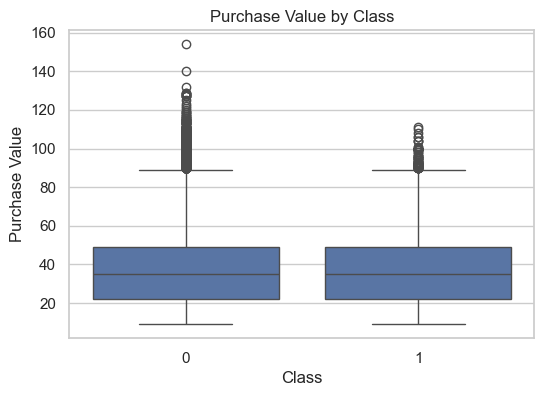

In [14]:
# === Purchase Value vs Class ===
plt.figure(figsize=(6, 4))
sns.boxplot(data=fraud_df, x='class', y='purchase_value')
plt.title("Purchase Value by Class")
plt.xlabel("Class")
plt.ylabel("Purchase Value")
save_plot(fig,"boxplot_purchase_value_by_class.png")
plt.show()
